51.504 Machine Learning (Professional) 

HW1 Q5

Victoria Yong 1004455

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(a)	[6 points] (Cleaning Up) From the data set, write a code to construct a data set or matrix that reports the responses of everyone only for the eight questions related to the “Realistic” trait, which are R1 to R8. You are basically truncating the matrix here to an 8000+ by 8 matrix. Next, you will notice there are some −1 entries in the matrix, these are the people who left the answers blank or drew some squiggly smiley face that makes no sense. Write a code to get rid of these people altogether. By this I mean, you want to remove the rows with −1 on it, not launch nuclear missiles at them. This is essentially cleaning up the data. Since you won’t be able to print an 8000+ by 8 matrix on paper, please submit code instead.

In [2]:
data =  np.genfromtxt("RIASEC.csv", names=True, dtype=int, usecols=[f"R{x}" for x in range(1, 9)])
labels = data.dtype.names

data = data.view((int, len(data.dtype.names)))
data = data[~np.any(data == -1, axis=1)]


print(labels)
print(data.shape)
print(data[:5])

('R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8')
(8478, 8)
[[3 1 4 2 1 2 1 1]
 [1 1 1 1 1 1 1 1]
 [3 2 1 1 1 1 2 1]
 [3 2 1 2 2 3 1 2]
 [3 1 3 4 3 4 3 3]]


(b)	[8 points] (Model selection) We want to see how the answers for the first question, R1, correlates with their R score. However we want to test the validity of our theory, so we will use the first 6500 people as training data. Therefore, write a code to compute the R score for each person. Treat the R score as the dependent variable and the R1 score as the independent variable, and compute the estimated regression function and the residual sum of squares for the first 6500 people.

In [3]:
class Regression():


    def __init__(self, X, y, X_test, y_test, **kwargs):
        self.X = X
        self.y = y
        self. X_t = X_test
        self. y_t = y_test

        self.lr = kwargs.pop('lr', 0.05)
        self.epochs = kwargs.pop('epochs', 10)
        self.order = kwargs.pop('order', 15)
        

    def fit(self, option = 0):
        """
        Function to calculate linear regression model. 

        Takes in option argument where
            0: Closed form multivariate linear regression
            1: Closed form linear regression

        Returns theta and predictions.
        """
        self.option = option
        if option == 0:
            theta, preds, error = self._closed_multivariate_linear_regression(self.X, self.y)
            title = f"Closed Multivariate Linear Regression | Train Error: {error}"

        elif option == 1: 
            theta, preds, error = self._closed_linear_regression(self.X, self.y)
            title = f"Closed Linear Regression | Train Error: {error}"
        
        else:
            return 'Invalid argument.'
        
        self._plot(self.X, self.y, preds, title)

    
    def test(self):

        """
        Function to calculate linear regression model on test data.
        Returns theta and predictions.
        """
        if self.option == 0:
            theta, preds, error = self._closed_multivariate_linear_regression(self.X_t, self.y_t)
            title = f"Closed Multivariate Linear Regression | Test Error: {error}"

        elif self.option == 1: 
            theta, preds, error = self._closed_linear_regression(self.X_t, self.y_t)
            title = f"Closed Linear Regression | Test Error: {error}"
            
        else:
            return 'Need to fit model first before testing.'
        
        self._plot(self.X_t, self.y_t, preds, title)

    def _closed_linear_regression(self, X, y):
        """
        Closed form linear regression. A linear regression can be modelled as
            theta = mean(y) - [r * (SD(y)/SD(x))] * mean(x),
            where r = 1/n * sum(xi*yi)

        X: Input vector
        y: Label vector
        Returns predictions and theta as numpy array

        Note: This didn't work well. Not sure why.
        """

        n = X.shape[0]
        r = 1/n * np.sum(np.multiply(X, y))

        theta = np.mean(y) - (r * (np.std(y)/np.std(X)) * np.mean(X))
        preds = X.dot(theta)
        error = self._sse(y, preds)

        return theta, self.preds, error


    def _closed_multivariate_linear_regression(self, X, y):
        """
        Closed form multivariate linear regression. A multivariate linear regression can be modelled as
            theta = inv(X.T dot X) dot (X.T dot y)

        X: Input vector
        y: Label vector
        Returns predictions and theta as numpy array
        """

        theta = np.dot(np.linalg.inv(X.T.dot(X)), X.T.dot(y))
        preds = X.dot(theta)    
        error = self._sse(y, preds)
        
        return theta, preds, error
    
    def _sse(self, y, preds):
        """
        Averaged residual sum of squares, as requested by part c. This is basically the MSE.
        Formula from wikipedia: https://en.wikipedia.org/wiki/Residual_sum_of_squares
        """
        return sum(np.square((y - preds))) / y.shape[0]
    

    def _plot(self, X, y, preds, title="model", dim = 1):
        
        plt.scatter(X[:, dim], y, color='g')
        plt.plot(X[:, dim], preds, color='b')
        plt.title(title)
        plt.show()
        
        return

In [4]:

# Calculate R score for each row
r = np.mean(data, axis=1)

# Prepare datasets
train_set = data[:6500, 0]
train_labels = r[:6500]

test_set = data[6500:, 0]
test_labels = r[6500:]

# add row of 1s to make X suitable for dot pdt
train_set = np.stack((np.ones(shape=train_set.shape), train_set), axis=1)
test_set = np.stack((np.ones(shape=test_set.shape), test_set), axis=1)

print(train_set[:5], test_set[:5])
print(train_set.shape, test_set.shape)

[[1. 3.]
 [1. 1.]
 [1. 3.]
 [1. 3.]
 [1. 3.]] [[1. 3.]
 [1. 4.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
(6500, 2) (1978, 2)


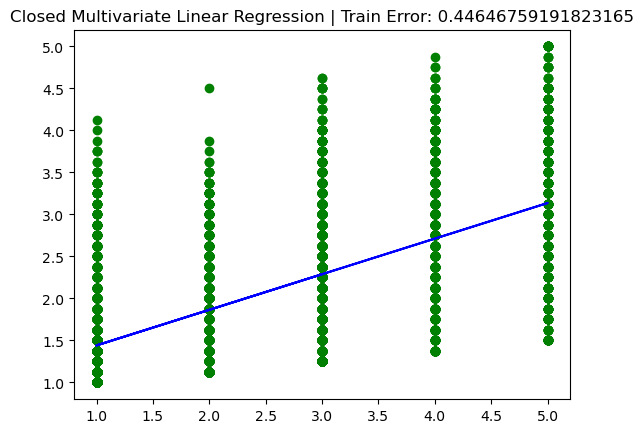

In [5]:
## Task: R1 vs R regression model

model = Regression(train_set, train_labels, test_set, test_labels)
model.fit()

(c)	[6 points] (Validation) We now want to see if our previous model generalizes well. Therefore, using the regression model in part b, calculate the residual sum of squares for the remaining people and compare the residual sum of squares (averaged) with that (averaged as well) for part b.

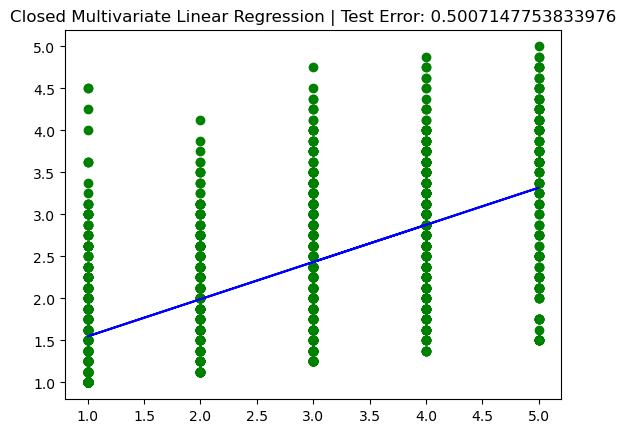

In [6]:
model.test()

Comparing the averaged residual sum of squares (MSE) values for part b (train) and part c (test):

    Train MSE: 0.4464
    Test MSE: 0.50071
The overall error values are close, which indicate that the model most likely generalizes well to this distribution.